# Exercise - Compensated Risk

### Data

Consider the excess return data in `data/spx_returns_weekly.xlsx`. 

### 1.
For each stock, calculate the (annualized) mean as well as the following measures of risk
* volatility
* skewness
* 5th quantile return
* max drawdown
* correlation to SPY

For each risk measure, make a scatter plot of stocks risk on the horizontal axis and the stock's mean return on the vertical axis.

### 2.
Do any of these scatterplots show strong evidence of a relationship between risk and return?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***

In [9]:
file = "data/spx_returns_weekly.xlsx"
df = pd.read_excel(file, sheet_name="s&p500 rets", index_col=0)
spy = pd.read_excel(file, sheet_name="benchmark rets", index_col=0)["SPY"]

vol = df.std(ddof=1)
vol =df.skew()

vol = df.quantile(0.05)


corr = df.corrwith(spy)





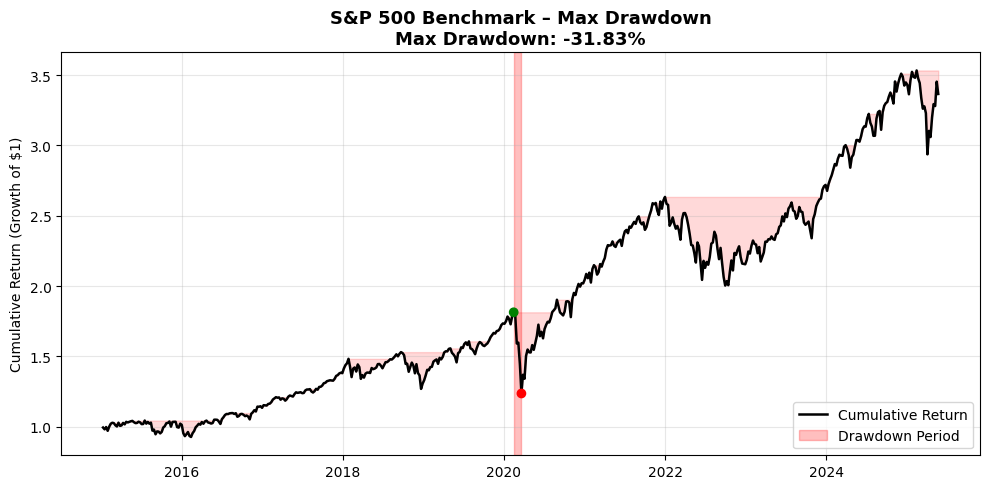

{'max_drawdown': -0.3182909477786037, 'peak_date': Timestamp('2020-02-14 00:00:00'), 'trough_date': Timestamp('2020-03-20 00:00:00'), 'recovery_date': Timestamp('2020-08-07 00:00:00')}


In [12]:
def plot_max_drawdown(returns: pd.Series, title="Max Drawdown"):
    """
    Plot cumulative returns and highlight the maximum drawdown period.
    Returns max drawdown as a negative number (e.g., -0.32 for -32%).
    """
    # Compute cumulative performance
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = cumulative / running_max - 1

    # Locate max drawdown and its start/end
    trough_date = drawdown.idxmin()
    peak_date = cumulative.loc[:trough_date].idxmax()
    recovery_date = cumulative.loc[trough_date:].where(
        lambda x: x >= cumulative.loc[peak_date]
    ).first_valid_index()

    # Report as a negative number
    mdd = float(drawdown.min())  # already negative

    # --- Plot ---
    plt.figure(figsize=(10,5))
    plt.plot(cumulative, label="Cumulative Return", color="black", lw=1.8)
    plt.fill_between(cumulative.index, cumulative, running_max, color="red", alpha=0.15)
    plt.axvspan(peak_date, trough_date, color="red", alpha=0.25, label="Drawdown Period")
    plt.scatter([peak_date, trough_date],
                [cumulative.loc[peak_date], cumulative.loc[trough_date]],
                color=["green", "red"], zorder=5)

    plt.title(f"{title}\nMax Drawdown: {mdd:.2%}", fontsize=13, fontweight="bold")
    plt.ylabel("Cumulative Return (Growth of $1)")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    return {
        "max_drawdown": mdd,          # negative value
        "peak_date": peak_date,
        "trough_date": trough_date,
        "recovery_date": recovery_date
    }

# Example usage
file = "data/spx_returns_weekly.xlsx"
df = pd.read_excel(file, sheet_name="s&p500 rets", index_col=0)
spy = pd.read_excel(file, sheet_name="benchmark rets", index_col=0)["SPY"]

# Plot for SPY
info = plot_max_drawdown(spy, title="S&P 500 Benchmark – Max Drawdown")
print(info)